# Introduction to Matplotlib

Now that we can start doing serious numerical analysis with Numpy arrays, we also reach the stage where we can no longer print out hundreds or thousands of values, so we need to be able to make plots to show the results.

The **Matplotlib** package can be used to make scientific-grade plots. You can import it with:

In [1]:
import matplotlib.pyplot as plt

If you are using IPython and you want to make interactive plots, you can start up IPython with:

    ipython --matplotlib

If you now type a plotting command, an interactive plot will pop up.

If you use the IPython notebook, add a cell containing:

In [2]:
%matplotlib inline

and the plots will appear inside the notebook.

## Basic plotting

The main plotting function is called ``plot``:

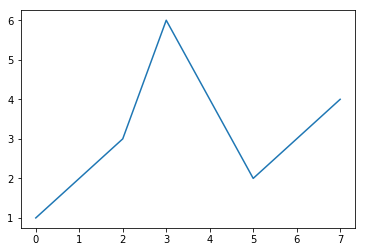

In [3]:
plt.plot([1,2,3,6,4,2,3,4])

In the above example, we only gave a single list, so it will assume the x values are the indices of the list/array.

However, we can instead specify the x values:

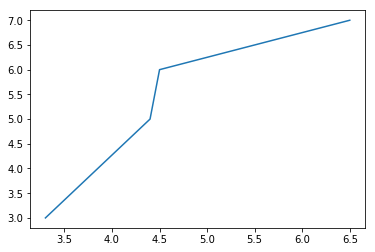

In [4]:
plt.plot([3.3, 4.4, 4.5, 6.5], [3., 5., 6., 7.])

Matplotlib can take Numpy arrays, so we can do for example:

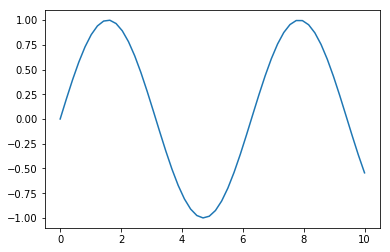

In [5]:
import numpy as np
x = np.linspace(0., 10., 50)
y = np.sin(x)
plt.plot(x, y)

The ``plot`` function is actually quite complex, and for example can take arguments specifying the type of point, the color of the line, and the width of the line:

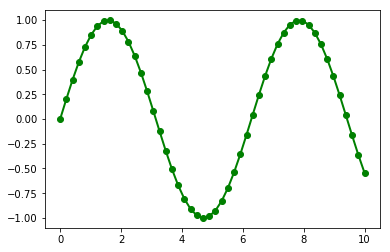

In [6]:
plt.plot(x, y, marker='o', color='green', linewidth=2)

The line can be hidden with:

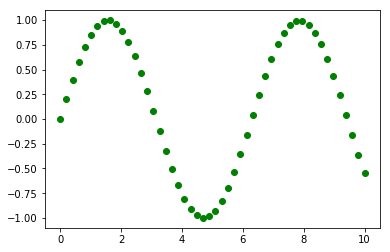

In [7]:
plt.plot(x, y, marker='o', color='green', linewidth=0)

If you are interested, you can specify some of these attributes with a special syntax, which you can read up more about in the Matplotlib documentation:

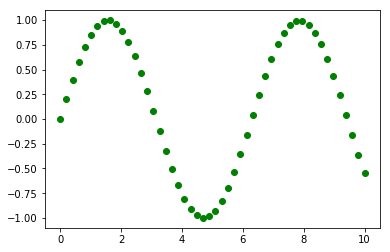

In [8]:
plt.plot(x, y, 'go')  # means green and circles

## Exercise 1

We start off by loading the ``data/munich_temperatures_average_with_bad_data.txt`` file which we encountered in the introduction to Numpy (section 10):

In [9]:
# The following code reads in the file and removes bad values
import numpy as np
date, temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)
keep = np.abs(temperature) < 90
date = date[keep]
temperature = temperature[keep]

Now that the data has been read in, plot the temperature against time:

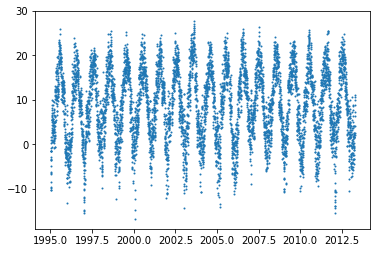

In [10]:
# your solution here
plt.plot(date, temperature, marker='o', markersize=1, linewidth=0)

Next, try plotting the data against the fraction of the year (all years on top of each other). Note that you can use the ``%`` (modulo) operator to find the fractional part of the dates:

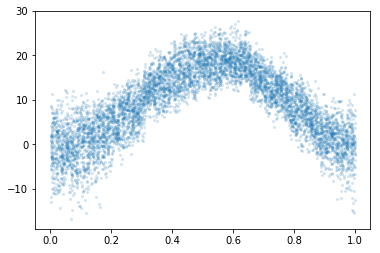

In [11]:
# your solution here
plt.plot(date%1,temperature,'.',linewidth=0, alpha=0.2, mew=0)

## Other types of plots

### Scatter plots

While the ``plot`` function can be used to show scatter plots, it is mainly used for line plots, and the ``scatter`` function is more often used for scatter plots, because it allows more fine control of the markers:

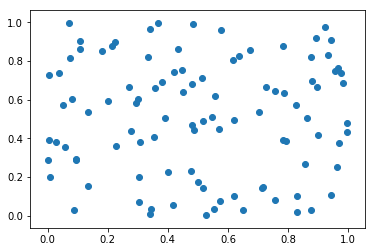

In [12]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)

### Histograms

Histograms are easy to plot using the ``hist`` function:

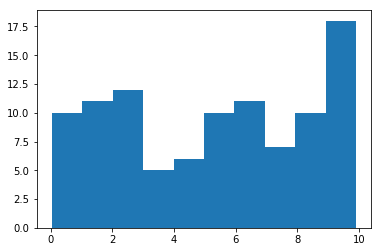

In [13]:
v = np.random.uniform(0., 10., 100)
h = plt.hist(v)  # we do h= to capture the output of the function, but we don't use it

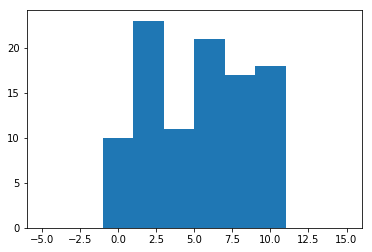

In [14]:
h = plt.hist(v, range=[-5., 15.], bins=10)

### Images

You can also show two-dimensional arrays with the ``imshow`` function:

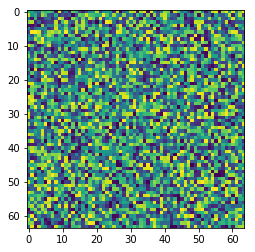

In [15]:
array = np.random.random((64, 64))
plt.imshow(array)

And the colormap can be changed:

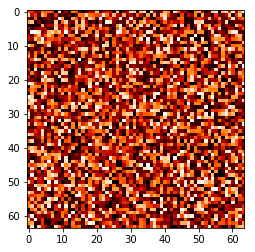

In [16]:
plt.imshow(array, cmap=plt.cm.gist_heat)

### Field lines

For a **vector field**, you can plot a depiction of the field lines with *plt.streamplot*

Here this is done in the x-y plane for the field
    $$\vec{K}(\vec{r})=\vec{K}(x,y,z) = (-y,x,0) = \vec{e}_z \times \vec{r}$$
    
We use *np.meshgrid* that returns N-D arrays according to the number of input arrays.

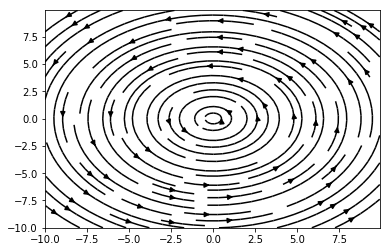

In [17]:
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
ky,kx=np.meshgrid(x,-y)
plt.streamplot(x,y,kx,ky,color='k')

In [18]:
# For reference:
x=[1,2,3]
y=[1,2]
(a,b)=np.meshgrid(x,y)
print(np.shape(a),np.shape(b))
print(a)
print(b)

(2, 3) (2, 3)
[[1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]]


## Customizing plots

You can easily customize plots. For example, the following code adds axis labels, and sets the x and y ranges explicitly:

(0.0, 1.0)

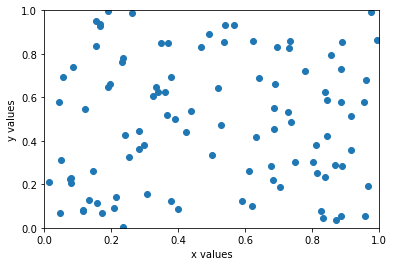

In [19]:
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.xlim(0., 1.)
plt.ylim(0., 1.)

## Saving plots to files

To save a plot to a file, you can do for example:

In [20]:
plt.savefig('my_plot.pdf')

and you can then view the resulting file like you would view a normal image. On Linux, you can also do:

    $ feh my_plot.png

in the terminal (or whichever image viewer is installed, perhaps 'eog').

## Interactive plotting

One of the nice features of Matplotlib is the ability to make interactive plots. When using IPython, you can do:

    %matplotlib qt
    
to change the backend to be interactive, after which plots that you make will be interactive.

## Learning more

The easiest way to find out more about a function and available options is to use the ``?`` help in IPython:

        In [11]: plt.hist?

    Definition: plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, **kwargs)
    Docstring:
    Plot a histogram.

    Call signature::

      hist(x, bins=10, range=None, normed=False, weights=None,
             cumulative=False, bottom=None, histtype='bar', align='mid',
             orientation='vertical', rwidth=None, log=False,
             color=None, label=None, stacked=False,
             **kwargs)

    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.

    etc.

But sometimes you don't even know how to make a specific type of plot, in which case you can look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) for example plots and scripts.


## Exercise 2

1. Use Numpy to generate 10000 random values following a Gaussian/Normal distribution, and make a histogram. Try changing the number of bins to properly see the Gaussian. Try overplotting a Gaussian function on top of it using a colored line, and adjust the normalization so that the histogram and the line are aligned.

2. Do the same for a Poisson distribution. Compare the Poisson distribution for expectation values $\lambda <15$ with the appropriate Gaussian.

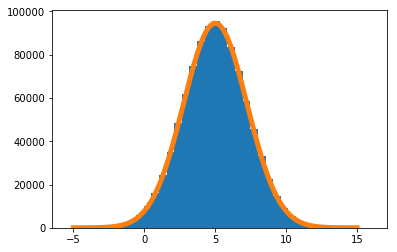

In [21]:

# your solution here
def gaussian(x,mu,sig):
    return (1/(np.sqrt(2*np.pi)*sig)) * np.exp(-(x-mu)**2/(2*sig**2))
rnd = np.random.normal(5.,np.sqrt(5.),1000000)
h = plt.hist(rnd, bins=40)
x = np.linspace(-5,15,1000)
f = 530000*gaussian(x,5.,np.sqrt(5.))
plt.plot(x,f, linewidth=5)

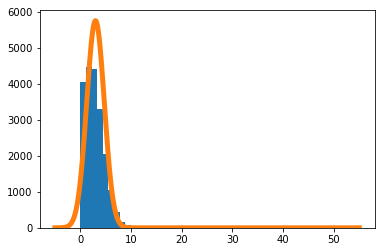

In [22]:
rnd = np.random.poisson(3.,20000)
h = plt.hist(rnd, bins=np.linspace(0,10,10))
x = np.linspace(-5,55,1000)
f = 25000*gaussian(x,3.,np.sqrt(3.))
plt.plot(x,f, linewidth=5)

## Exercise 3

Work out the magnetic field lines of two equal but infinite line currents  along the z-axis that are separated by a distance $a$ along the y-axis.

Since the stream lines are scaled, one can drop constants.

The $\vec{B}$-Field of a single line current $I$ is
$$\vec{B} (\vec{r})= \frac{\mu_0 I}{2 \pi} \frac{1}{|\vec{r}|} \vec{e}_{\varphi}$$
    
**Only** with time left: Can you plot the fieldlines in the x-y plane for a circular coil with radius a in the x-z plane?
The Biot-Savart law for a wire element is

$$d\vec{B} (\vec{r})= \frac{\mu_0 I}{4 \pi} \frac{d \vec{l} \times \vec{r}}{|\vec{r}|^3}$$

where $\vec{r}$ is the vector from the current element to the place of measurement.

You can even code the problem in a way that you can add an aribitrary number of coils, e.g. for a long coil or a ring coil (torus).

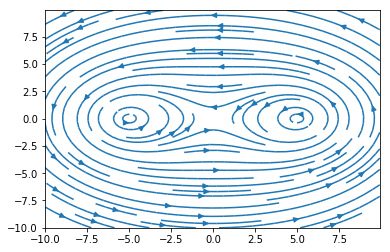

In [23]:

# your solution here
x = np.arange(-10.,10.,.1)
y = np.arange(-10.,10.,.1)
a = 10.
xx,yy = np.meshgrid(x,y)
r1_2 = (xx-0.5*a)**2+yy**2
r2_2 = (xx+0.5*a)**2+yy**2

ky1,kx1=np.meshgrid((x-.5*a)/((x-.5*a)**2.+y**2.),-y/((x-.5*a)**2.+y**2.))
ky2,kx2=np.meshgrid((x+.5*a)/((x+.5*a)**2.+y**2.),-y/((x+.5*a)**2.+y**2.))

b1x,b1y = -yy/r1_2,(xx-0.5*a)/r1_2
b2x,b2y = -yy/r2_2,(xx+0.5*a)/r2_2

plt.streamplot(x,y,b1x+b2x,b1y+b2y)
# plt.streamplot(x,y,kx1+kx2,ky1+ky2)

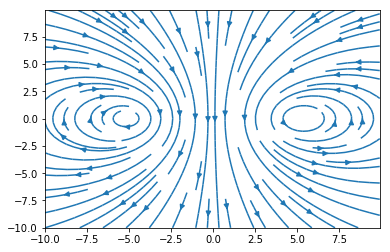

In [24]:
x = np.arange(-10.,10.,.1)
y = np.arange(-10.,10.,.1)
a = 5.
n = 100
dphi = 2.*np.pi/n

xx,yy = np.meshgrid(x,y)
bx,by = 0.*xx,0.*yy

for phi in np.arange(0.,2.*np.pi,dphi):
    r = np.sqrt((xx-a*np.cos(phi))**2.+yy**2.+a**2*np.sin(phi)**2.)
    bx += -a*np.cos(phi)*yy*dphi/r**3.
    by += -a*(a-np.cos(phi)*xx)*dphi/r**3.

plt.streamplot(x,y,bx,by)